In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [18]:
file_path = '../output/cmp123_crit_numcores_random_10/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/cmp123_crit_numcore_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

only_ls = [0.0] * len(criticality_prob_list)
ds = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [19]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_ls, core_ds, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    only_ls[index] += core_ls
    ds[index] += core_ds
    ours[index] += core_ours

In [20]:
print(only_ls)
print(ds)
print(ours)

[19.6, 17.6, 19.2, 18.8, 21.2, 18.6, 20.2, 19.0, 18.8, 19.4, 19.6]
[5.0, 5.0, 7.0, 8.0, 9.0, 11.4, 13.4, 13.6, 16.4, 17.2, 19.6]
[5.0, 4.8, 6.6, 7.8, 8.8, 11.4, 13.4, 13.6, 16.4, 17.2, 19.6]


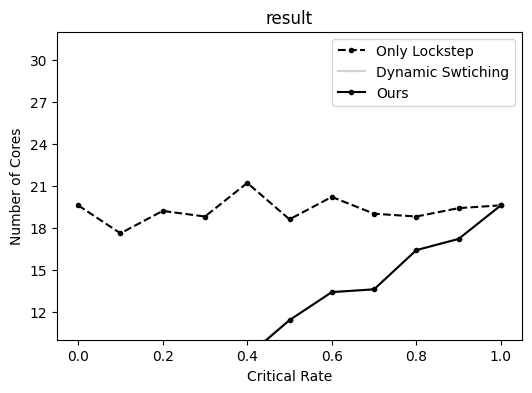

In [21]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, only_ls, label='Only Lockstep', color='black', linestyle='dashed', marker='.')
plt.plot(criticality_prob_list, ds, label='Dynamic Swtiching', color='lightgray', marker='_')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', marker='.')

plt.title('result')
plt.xlabel('Critical Rate')
plt.ylabel('Number of Cores')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ylim(0,32)
plt.legend()
plt.show()